In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load CSV dataset
csv_path = 'digit-recognizer/train.csv'
data = pd.read_csv(csv_path)
num_classes = 10
batch_size = 32

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
unique_count = data['label'].value_counts()
unique_count

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
class_weights = {}
for x in range(num_classes):
    class_weights[x] = 1 / unique_count[x]
class_weights

{0: 0.0002420135527589545,
 1: 0.0002134927412467976,
 2: 0.00023940627244433804,
 3: 0.00022983222247759135,
 4: 0.0002455795677799607,
 5: 0.00026350461133069827,
 6: 0.00024172105390379503,
 7: 0.00022722108611679165,
 8: 0.0002461235540241201,
 9: 0.0002387774594078319}

In [7]:
# Extract labels and features
labels = data.iloc[:, 0]
features = data.iloc[:, 1:]

# Normalize pixel values to [0, 1]
features = features / 255.0

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape features to match CNN input shape (28x28x1)
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)

In [8]:
# Initialize the generator
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Randomly zoom in/out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any empty pixels with the nearest value
)

generated_data = datagen.flow(X_train, y_train, batch_size=batch_size)

In [9]:
# Build the sequential model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model", monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with class weights
history = model.fit(
    generated_data,
    epochs=60,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=[checkpoint]
)

Epoch 1/60
1047/1050 [============================>.] - ETA: 0s - loss: 2.0977e-04 - accuracy: 0.7038INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 22s 20ms/step - loss: 2.0946e-04 - accuracy: 0.7042 - val_loss: 0.2367 - val_accuracy: 0.9292
Epoch 2/60
1050/1050 [==============================] - ETA: 0s - loss: 9.8944e-05 - accuracy: 0.8665INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 9.8944e-05 - accuracy: 0.8665 - val_loss: 0.1575 - val_accuracy: 0.9527
Epoch 3/60
1050/1050 [==============================] - 19s 18ms/step - loss: 7.7876e-05 - accuracy: 0.8970 - val_loss: 0.2034 - val_accuracy: 0.9320
Epoch 4/60
1049/1050 [============================>.] - ETA: 0s - loss: 6.5077e-05 - accuracy: 0.9129INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 6.5044e-05 - accuracy: 0.9130 - val_loss: 0.1171 - val_accuracy: 0.9637
Epoch 5/60
1050/1050 [==============================] - 19s 18ms/step - loss: 5.7512e-05 - accuracy: 0.9255 - val_loss: 0.1191 - val_accuracy: 0.9624
Epoch 6/60
1050/1050 [==============================] - ETA: 0s - loss: 5.1468e-05 - accuracy: 0.9328INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 5.1468e-05 - accuracy: 0.9328 - val_loss: 0.1043 - val_accuracy: 0.9673
Epoch 7/60
1050/1050 [==============================] - 19s 18ms/step - loss: 4.8439e-05 - accuracy: 0.9351 - val_loss: 0.1056 - val_accuracy: 0.9652
Epoch 8/60
1048/1050 [============================>.] - ETA: 0s - loss: 4.5810e-05 - accuracy: 0.9404INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 4.5811e-05 - accuracy: 0.9404 - val_loss: 0.0904 - val_accuracy: 0.9711
Epoch 9/60
1050/1050 [==============================] - 19s 18ms/step - loss: 4.1981e-05 - accuracy: 0.9456 - val_loss: 0.1086 - val_accuracy: 0.9643
Epoch 10/60
1050/1050 [==============================] - 19s 18ms/step - loss: 4.0128e-05 - accuracy: 0.9484 - val_loss: 0.1004 - val_accuracy: 0.9685
Epoch 11/60
1050/1050 [==============================] - 19s 18ms/step - loss: 3.8949e-05 - accuracy: 0.9490 - val_loss: 0.1016 - val_accuracy: 0.9681
Epoch 12/60
1050/1050 [==============================] - 19s 18ms/step - loss: 3.7373e-05 - accuracy: 0.9512 - val_loss: 0.1014 - val_accuracy: 0.9677
Epoch 13/60
1049/1050 [============================>.] - ETA: 0s - loss: 3.6561e-05 - accuracy: 0.9521INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 3.6545e-05 - accuracy: 0.9521 - val_loss: 0.0895 - val_accuracy: 0.9712
Epoch 14/60
1050/1050 [==============================] - 19s 18ms/step - loss: 3.4753e-05 - accuracy: 0.9551 - val_loss: 0.0891 - val_accuracy: 0.9704
Epoch 15/60
1050/1050 [==============================] - ETA: 0s - loss: 3.4494e-05 - accuracy: 0.9548INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 3.4494e-05 - accuracy: 0.9548 - val_loss: 0.0741 - val_accuracy: 0.9769
Epoch 16/60
1050/1050 [==============================] - 19s 18ms/step - loss: 3.2865e-05 - accuracy: 0.9559 - val_loss: 0.0764 - val_accuracy: 0.9764
Epoch 17/60
1050/1050 [==============================] - 20s 19ms/step - loss: 3.3643e-05 - accuracy: 0.9558 - val_loss: 0.0781 - val_accuracy: 0.9742
Epoch 18/60
1047/1050 [============================>.] - ETA: 0s - loss: 3.1407e-05 - accuracy: 0.9583INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 3.1440e-05 - accuracy: 0.9583 - val_loss: 0.0660 - val_accuracy: 0.9776
Epoch 19/60
1049/1050 [============================>.] - ETA: 0s - loss: 3.0851e-05 - accuracy: 0.9594INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 3.0846e-05 - accuracy: 0.9594 - val_loss: 0.0695 - val_accuracy: 0.9777
Epoch 20/60
1050/1050 [==============================] - 20s 19ms/step - loss: 3.0019e-05 - accuracy: 0.9609 - val_loss: 0.0928 - val_accuracy: 0.9698
Epoch 21/60
1050/1050 [==============================] - 20s 19ms/step - loss: 2.9562e-05 - accuracy: 0.9597 - val_loss: 0.0860 - val_accuracy: 0.9723
Epoch 22/60
1050/1050 [==============================] - 20s 19ms/step - loss: 2.9371e-05 - accuracy: 0.9615 - val_loss: 0.0765 - val_accuracy: 0.9744
Epoch 23/60
1050/1050 [==============================] - 20s 19ms/step - loss: 2.8786e-05 - accuracy: 0.9623 - val_loss: 0.0699 - val_accuracy: 0.9752
Epoch 24/60
1049/1050 [============================>.] - ETA: 0s - loss: 2.8432e-05 - accuracy: 0.9637INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 2.8448e-05 - accuracy: 0.9636 - val_loss: 0.0639 - val_accuracy: 0.9792
Epoch 25/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.7950e-05 - accuracy: 0.9631 - val_loss: 0.0714 - val_accuracy: 0.9767
Epoch 26/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.7212e-05 - accuracy: 0.9651 - val_loss: 0.0932 - val_accuracy: 0.9711
Epoch 27/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.7135e-05 - accuracy: 0.9630 - val_loss: 0.0698 - val_accuracy: 0.9760
Epoch 28/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.6472e-05 - accuracy: 0.9651 - val_loss: 0.0820 - val_accuracy: 0.9731
Epoch 29/60
1048/1050 [============================>.] - ETA: 0s - loss: 2.6575e-05 - accuracy: 0.9667INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 21s 20ms/step - loss: 2.6540e-05 - accuracy: 0.9667 - val_loss: 0.0610 - val_accuracy: 0.9793
Epoch 30/60
1050/1050 [==============================] - 20s 19ms/step - loss: 2.6297e-05 - accuracy: 0.9660 - val_loss: 0.0737 - val_accuracy: 0.9754
Epoch 31/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.5633e-05 - accuracy: 0.9661 - val_loss: 0.0719 - val_accuracy: 0.9760
Epoch 32/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.5522e-05 - accuracy: 0.9653 - val_loss: 0.0663 - val_accuracy: 0.9776
Epoch 33/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.4143e-05 - accuracy: 0.9682 - val_loss: 0.0716 - val_accuracy: 0.9762
Epoch 34/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.5104e-05 - accuracy: 0.9674 - val_loss: 0.0732 - val_accuracy: 0.9762
Epoch 35/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.4895e-05 - accuracy: 0.96

INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 2.4554e-05 - accuracy: 0.9682 - val_loss: 0.0664 - val_accuracy: 0.9799
Epoch 37/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.4367e-05 - accuracy: 0.9678 - val_loss: 0.0734 - val_accuracy: 0.9767
Epoch 38/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.4592e-05 - accuracy: 0.9668 - val_loss: 0.0660 - val_accuracy: 0.9780
Epoch 39/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.3353e-05 - accuracy: 0.9695 - val_loss: 0.0939 - val_accuracy: 0.9718
Epoch 40/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.3265e-05 - accuracy: 0.9693 - val_loss: 0.0782 - val_accuracy: 0.9757
Epoch 41/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.3516e-05 - accuracy: 0.9697 - val_loss: 0.0765 - val_accuracy: 0.9745
Epoch 42/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.3164e-05 - accuracy: 0.96

INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 2.0656e-05 - accuracy: 0.9721 - val_loss: 0.0584 - val_accuracy: 0.9812
Epoch 55/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.2888e-05 - accuracy: 0.9702 - val_loss: 0.0751 - val_accuracy: 0.9764
Epoch 56/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.0825e-05 - accuracy: 0.9737 - val_loss: 0.0756 - val_accuracy: 0.9764
Epoch 57/60
1049/1050 [============================>.] - ETA: 0s - loss: 2.0935e-05 - accuracy: 0.9723INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 2.0937e-05 - accuracy: 0.9723 - val_loss: 0.0527 - val_accuracy: 0.9837
Epoch 58/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.0850e-05 - accuracy: 0.9735 - val_loss: 0.0766 - val_accuracy: 0.9763
Epoch 59/60
1050/1050 [==============================] - ETA: 0s - loss: 2.0040e-05 - accuracy: 0.9750INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


1050/1050 [==============================] - 20s 19ms/step - loss: 2.0040e-05 - accuracy: 0.9750 - val_loss: 0.0492 - val_accuracy: 0.9857
Epoch 60/60
1050/1050 [==============================] - 19s 18ms/step - loss: 2.1458e-05 - accuracy: 0.9714 - val_loss: 0.0547 - val_accuracy: 0.9825


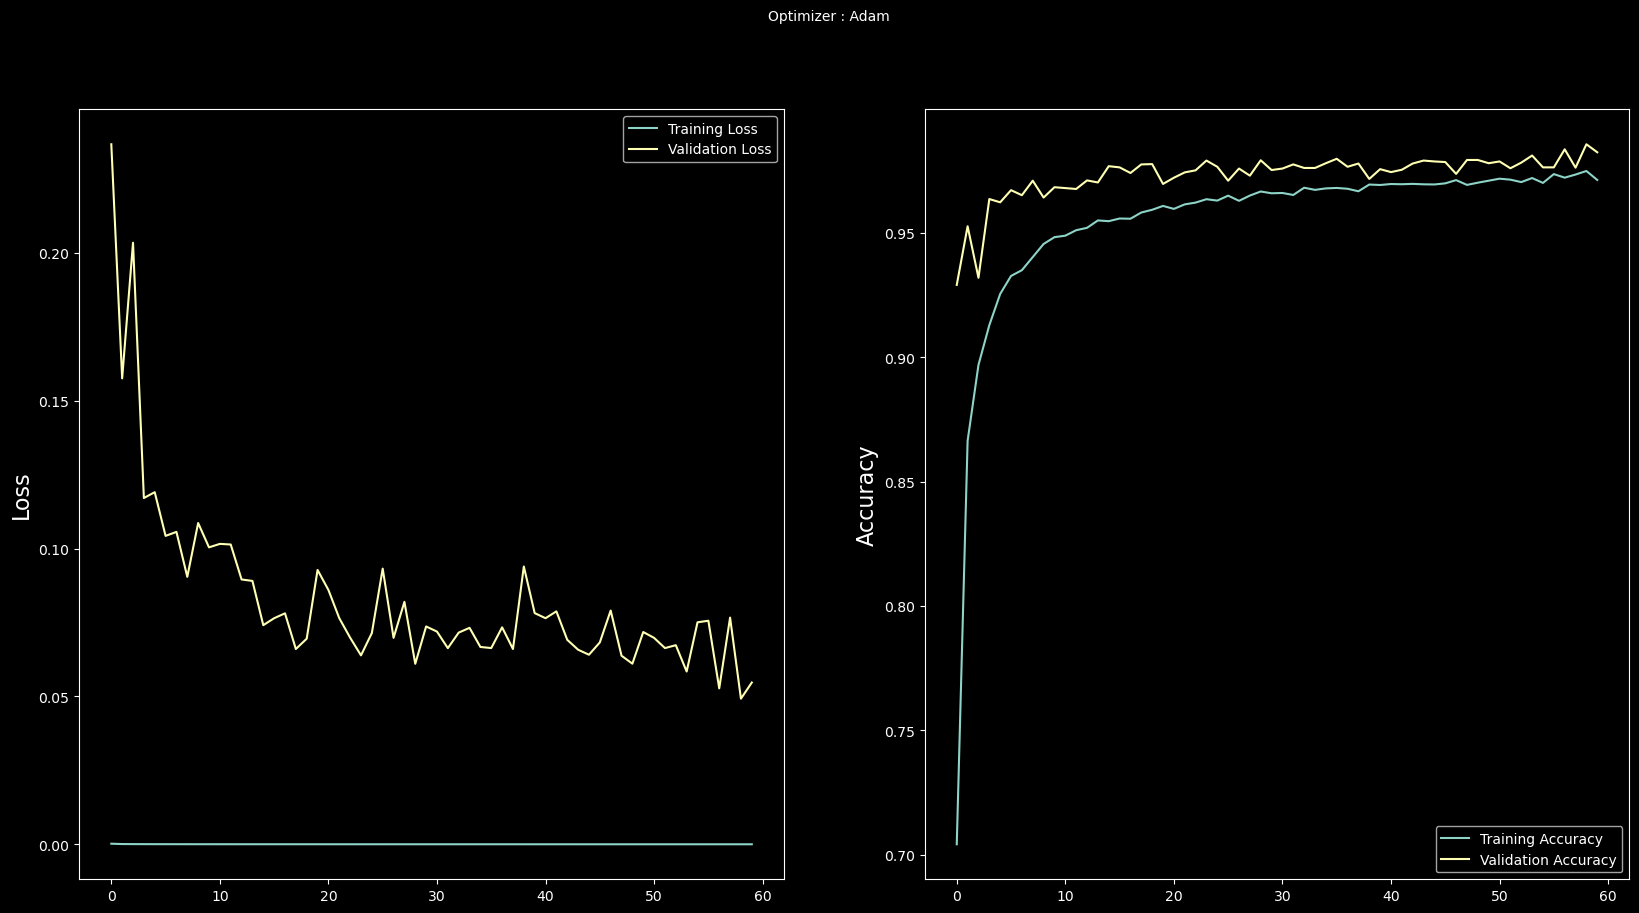

[0.00020945639698766172, 9.894386312225834e-05, 7.78761605033651e-05, 6.504426710307598e-05, 5.751162098022178e-05, 5.1468170568114147e-05, 4.843930946663022e-05, 4.58107897429727e-05, 4.1981125832535326e-05, 4.012820863863453e-05, 3.89493397960905e-05, 3.73727671103552e-05, 3.654482861747965e-05, 3.47526183759328e-05, 3.4494347346480936e-05, 3.286495848442428e-05, 3.364338772371411e-05, 3.1440449674846604e-05, 3.0846407753415406e-05, 3.0019102268852293e-05, 2.9561560950241983e-05, 2.9371385608101264e-05, 2.8786469556507654e-05, 2.8448408556869254e-05, 2.794978536257986e-05, 2.721180862863548e-05, 2.7134743504575454e-05, 2.64716254605446e-05, 2.6540348699199967e-05, 2.6296738724340685e-05, 2.563349698903039e-05, 2.552224395913072e-05, 2.414266054984182e-05, 2.5103508960455656e-05, 2.4895474780350924e-05, 2.4553504772484303e-05, 2.436707291053608e-05, 2.4591672627138905e-05, 2.335265526198782e-05, 2.3264788978849538e-05, 2.3516089640907012e-05, 2.3163975129136816e-05, 2.3233982574311085

In [10]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
print(history.history['loss'])
print(history.history['val_loss'])
print(history.history['accuracy'])
print(history.history['val_accuracy'])

In [11]:
from tensorflow.keras.models import load_model

bestModel = load_model('./best_model')

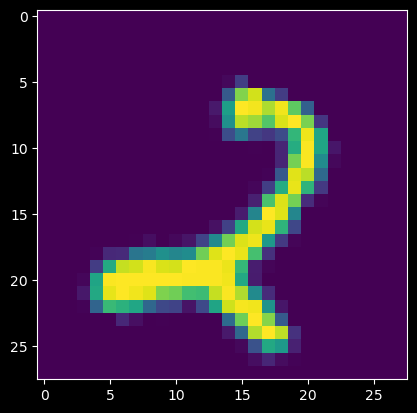

In [12]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2

plt.imshow(generated_data[0][0][1])

In [13]:
csv_test_path = 'digit-recognizer/test.csv'
test_data = pd.read_csv(csv_test_path)
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_data_modified = (test_data / 255.0).values.reshape(-1, 28, 28, 1)
test_data_display = test_data.values.reshape(-1, 28, 28, 1)

1/1 [==============================] - 0s 109ms/step


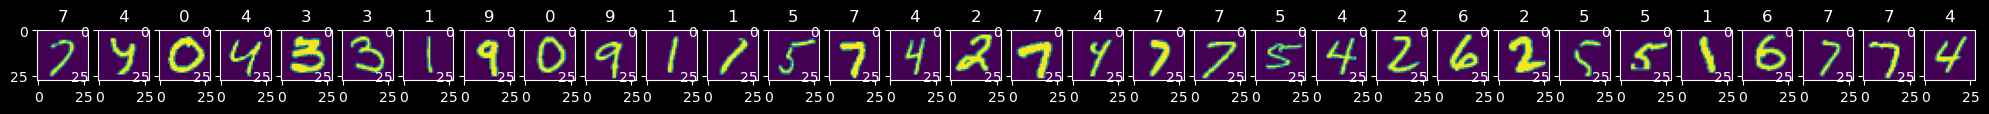

In [15]:
guess_num = random.randint(0, len(test_data_modified) - batch_size)
result = bestModel.predict(test_data_modified[guess_num:guess_num + batch_size])
classes_x=np.argmax(result,axis=1)
plt.figure(figsize = [25,10])
for i in range(guess_num, guess_num + batch_size):
    plt.subplot(1,batch_size,i - guess_num + 1); plt.imshow(test_data_display[i]); plt.title(classes_x[i - guess_num])